In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/subsample.csv')
G = nx.read_gml('../network/reviews_network.gml')

In [3]:
G.number_of_edges()

387474

In [4]:
G.number_of_nodes()

36084

In [5]:
u, v, data = list(G.edges(data=True))[0]
data

{'rating': 4, 'neg': 0.195, 'neu': 0.629, 'pos': 0.176, 'compound': -0.0772}

In [6]:
df.head()

,rating,parent_asin,user_id,main_category,average_rating,rating_number,price,neg,neu,pos,compound
0,4,B07Q585X37,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,computers,4.5,66001.0,3.99,0.195,0.629,0.176,-0.0772
1,4,B07F71KFMQ,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,industrial & scientific,4.7,2477.0,9.99,0.204,0.510,0.286,0.2023
2,5,B0B2Y5WYRG,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,computers,4.7,24375.0,6.99,0.000,0.788,0.212,0.7351
3,5,B08KG14KCT,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,computers,4.8,75974.0,395.00,0.164,0.302,0.534,0.9001
4,5,B000Q85WOK,AEFKF6R2GUSK2AWPSWRR4ZO36JVQ,all electronics,4.3,816.0,30.00,0.149,0.540,0.311,0.7082


In [7]:
G.nodes[[n for n, d in G.nodes(data=True) if d['type'] == 'product'][0]]

{'type': 'product',
 'main_category': 'computers',
 'average_rating': 4.5,
 'rating_number': 66001.0,
 'price': 3.99}

In [8]:
print( G.nodes[[n for n, d in G.nodes(data=True) if d['type'] == 'user'][0]])

{'type': 'user'}


<Axes: title={'center': 'pos'}, xlabel='rating'>

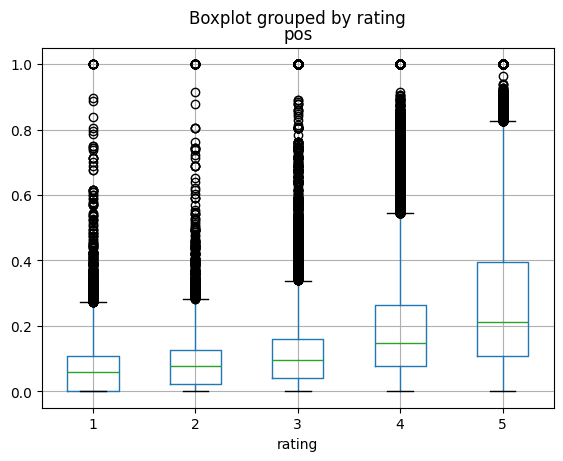

In [9]:
df.boxplot(column=['pos'], by='rating') 

<Axes: title={'center': 'neg'}, xlabel='rating'>

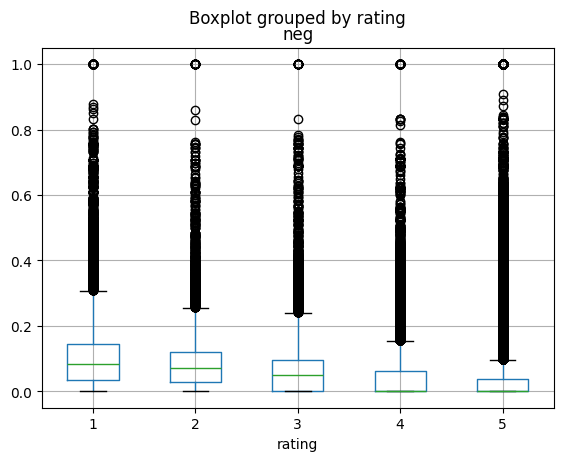

In [10]:
df.boxplot(column=['neg'], by='rating') 

<Axes: title={'center': 'neu'}, xlabel='rating'>

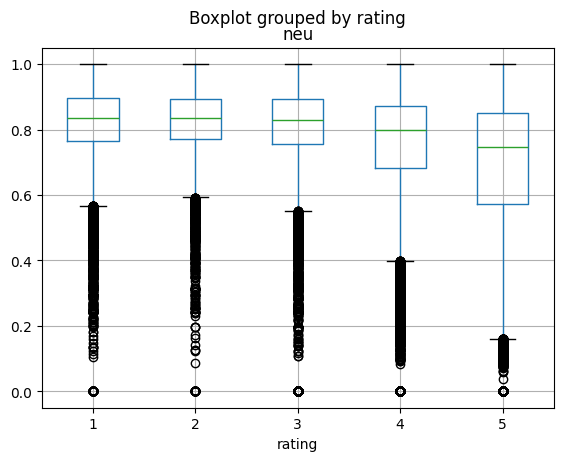

In [11]:
df.boxplot(column=['neu'], by='rating') 

<Axes: title={'center': 'compound'}, xlabel='rating'>

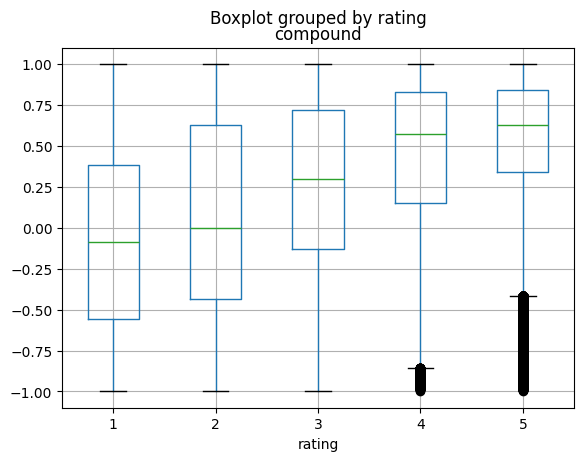

In [12]:
df.boxplot(column=['compound'], by='rating') 

<Axes: title={'center': 'rating_number'}, xlabel='rating'>

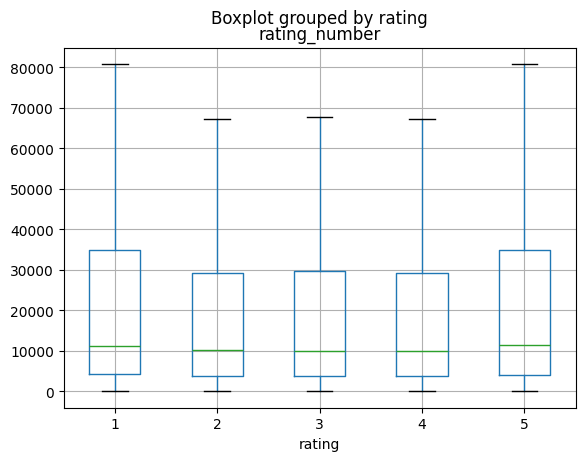

In [13]:
df.boxplot(column=['rating_number'], by='rating',  showfliers=False) 

<Axes: title={'center': 'price'}, xlabel='rating'>

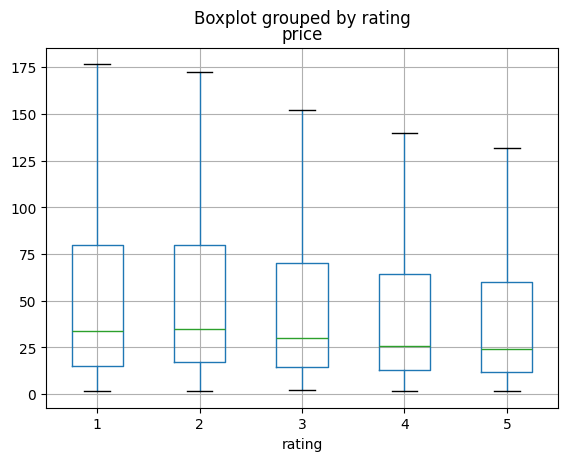

In [14]:
df.boxplot(column=['price'], by='rating', showfliers=False) 

<Axes: title={'center': 'average_rating'}, xlabel='rating'>

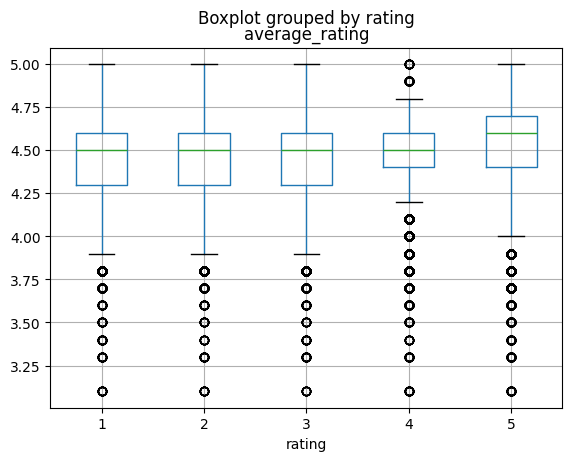

In [15]:
df.boxplot(column=['average_rating'], by='rating') 

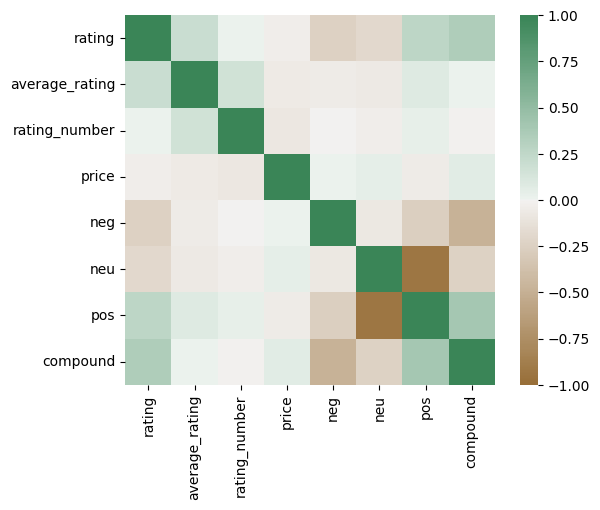

In [16]:
axis_corr = sns.heatmap(
df.drop(columns=['main_category', 'parent_asin', 'user_id']).corr(),
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(50, 500, n=500),
square=True
)